<a href="https://colab.research.google.com/github/lochana454/titanic/blob/main/Copy_of_Titanic_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
import io
test_df = pd.read_csv(io.BytesIO(uploaded['test.csv']))
train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
titanic = pd.concat([test_df, train_df],axis=0,sort=False)


In [ ]:
titanic.set_index('PassengerId',inplace=True)

In [ ]:
print("Variables:", titanic.columns)
titanic.head()

Variables: Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [ ]:
data ={
'Variable' : ['survival', 'pclass','sex','Age','sibsp','parch','ticket','fare','cabin','embarked'],
    'Definition' : ['Survival','Ticket class','Sex','Age in years','# of siblings / spouses aboard the Titanic',
                    '# of parents / children aboard the Titanic','Ticket number','Passenger fare','Cabin number',
                   'Port of Embarkation']}

Data_Dictionary = pd.DataFrame(data = data,columns=['Variable','Definition','Key'])
Data_Dictionary.fillna(' ', inplace=True)

Data_Dictionary.Key[0] = 'No -> 0, Yes -> 1'
Data_Dictionary.Key[1] = '1 = 1st, 2 = 2nd, 3 = 3rd'
Data_Dictionary.Key[9] = 'C = Cherbourg, Q = Queenstown, S = Southampton'

In [ ]:
Data_Dictionary

,Variable,Definition,Key
0,survival,Survival,"No -> 0, Yes -> 1"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,
3,Age,Age in years,
4,sibsp,# of siblings / spouses aboard the Titanic,
5,parch,# of parents / children aboard the Titanic,
6,ticket,Ticket number,
7,fare,Passenger fare,
8,cabin,Cabin number,
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


In [ ]:
titanic.describe()

,Pclass,Age,SibSp,Parch,Fare,Survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,891.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479,0.383838
std,0.837836,14.413493,1.041658,0.865560,51.758668,0.486592
min,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Name      1309 non-null   object 
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Ticket    1309 non-null   object 
 7   Fare      1308 non-null   float64
 8   Cabin     295 non-null    object 
 9   Embarked  1307 non-null   object 
 10  Survived  891 non-null    float64
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [ ]:
titanic.isnull().sum()

Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
Survived     418
dtype: int64

In [ ]:
titanic.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [ ]:
titanic.shape

(1309, 11)

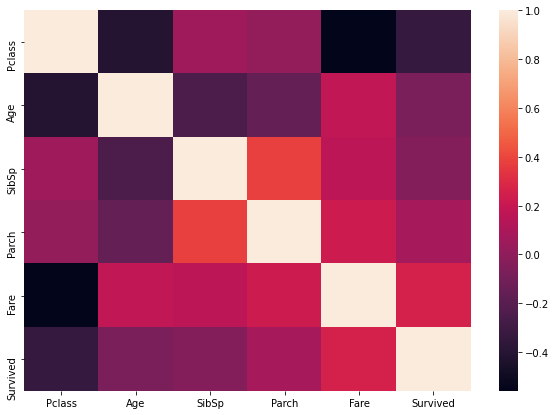

In [ ]:
torr = titanic.corr()
plt.figure(figsize=(10,7))
sns.heatmap(torr)

In [ ]:
titanic.Survived.value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

In [ ]:
round(((titanic[(titanic.Survived ==1)].SibSp != 0).sum()/342)*100,2)

38.6

In [ ]:
round(((titanic[(titanic.Survived ==0)].SibSp != 0).sum()/549)*100,2)


27.5

In [ ]:
round(((titanic[(titanic.Survived ==1)].Parch != 0).sum()/342)*100,2)

31.87

In [ ]:
round(((titanic[(titanic.Survived ==0)].Parch != 0).sum()/549)*100,2)

18.94

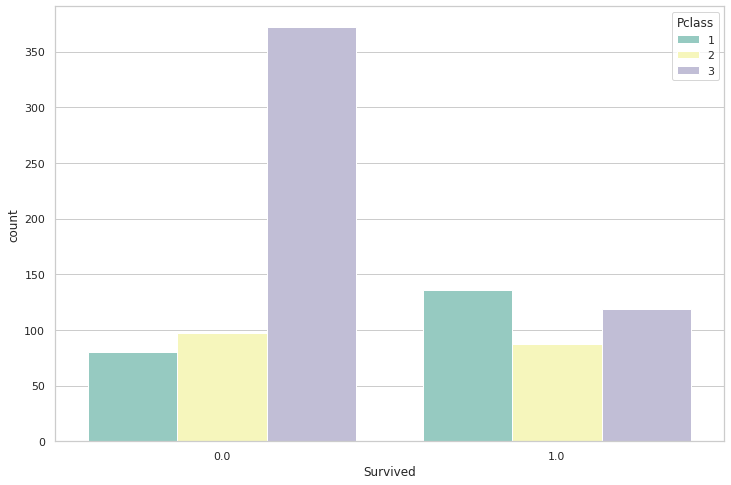

In [ ]:
plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid')
sns.countplot(x=titanic.Survived, hue=titanic.Pclass, palette='Set3')

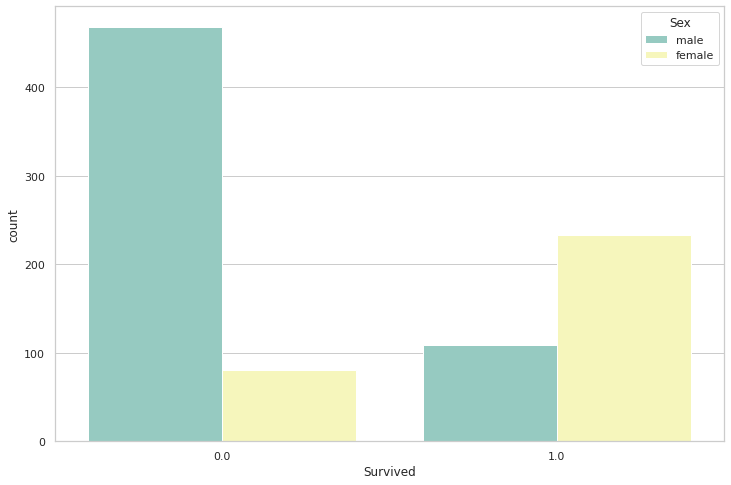

In [ ]:
plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid')
sns.countplot(x=titanic.Survived, hue=titanic.Sex, palette='Set3')


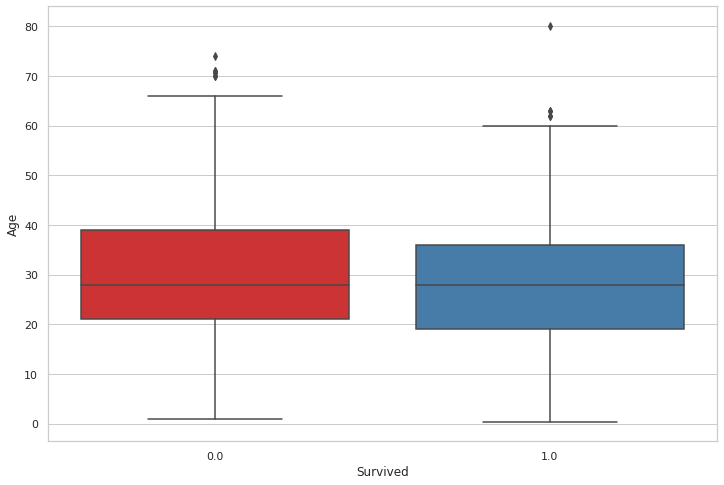

In [ ]:
plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid')
sns.boxplot(x=titanic.Survived, y = titanic.Age, palette='Set1')

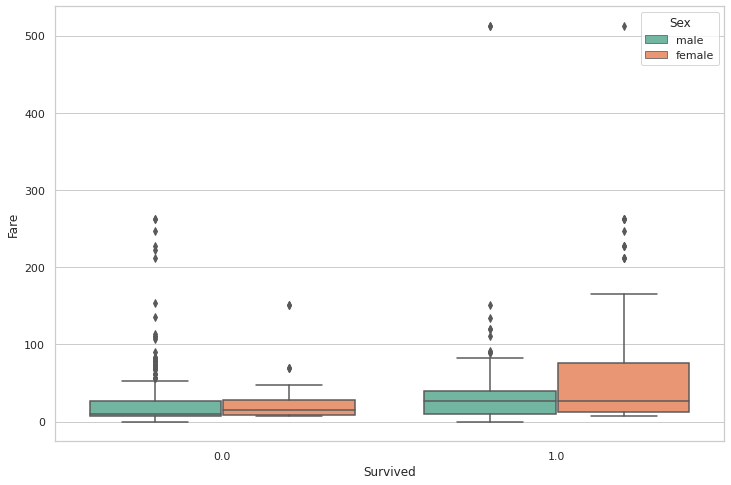

In [ ]:
plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid')
sns.boxplot(x=titanic.Survived, y = titanic.Fare, palette='Set2', hue=titanic.Sex)


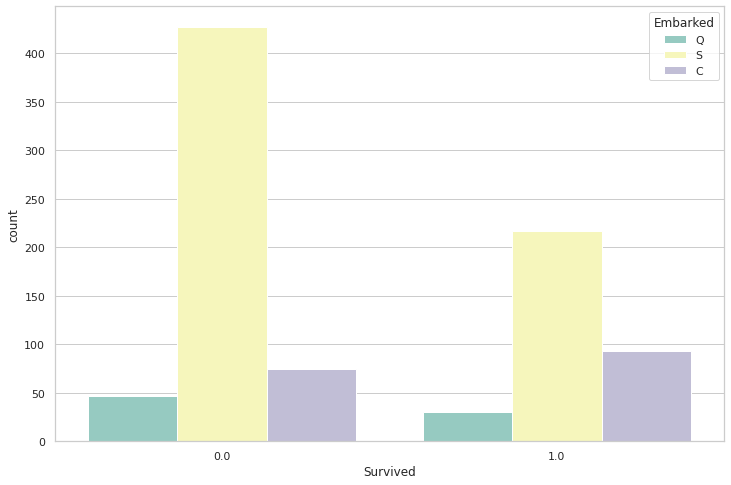

In [ ]:
plt.figure(figsize=(12,8))
sns.set_theme(style='whitegrid')
sns.countplot(x=titanic.Survived, hue=titanic.Embarked, palette='Set3')


In [ ]:
titanic.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [ ]:
titanic.Pclass.isnull().sum()

0

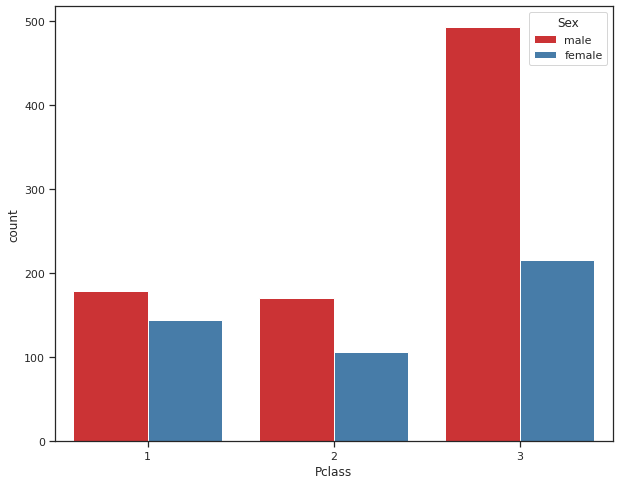

In [ ]:
plt.figure(figsize=(10,8))
sns.set_theme(style='ticks')
sns.countplot(x=titanic.Pclass, hue=titanic.Sex, palette='Set1' )


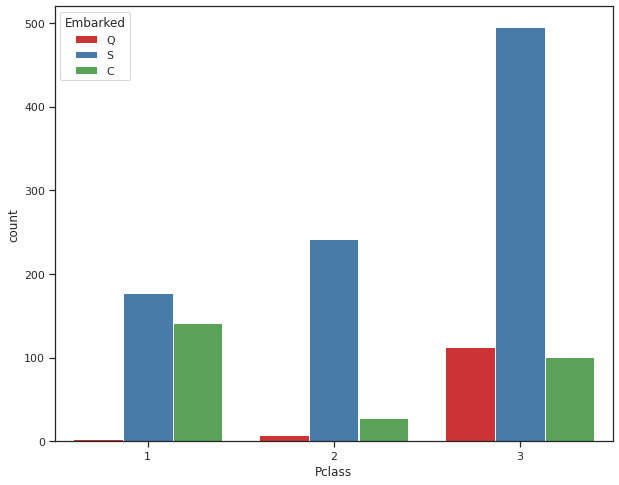

In [ ]:
plt.figure(figsize=(10,8))
sns.set_theme(style='ticks')
sns.countplot(x=titanic.Pclass, hue=titanic.Embarked, palette='Set1')

In [ ]:
titanic.Name

PassengerId
892                                Kelly, Mr. James
893                Wilkes, Mrs. James (Ellen Needs)
894                       Myles, Mr. Thomas Francis
895                                Wirz, Mr. Albert
896    Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
887                           Montvila, Rev. Juozas
888                    Graham, Miss. Margaret Edith
889        Johnston, Miss. Catherine Helen "Carrie"
890                           Behr, Mr. Karl Howell
891                             Dooley, Mr. Patrick
Name: Name, Length: 1309, dtype: object

In [ ]:
titanic.Name.isnull().sum()

0

In [ ]:
titanic.Name.map(lambda x : x.split(',')[0]).value_counts()[:15]

Sage         11
Andersson    11
Asplund       8
Goodwin       8
Davies        7
Panula        6
Skoog         6
Ford          6
Fortune       6
Rice          6
Smith         6
Carter        6
Johnson       6
Brown         6
Thomas        5
Name: Name, dtype: int64

In [ ]:
titanic[titanic.Name.map(lambda x : x.split(',')[0]) == titanic.Name.map(lambda x : x.split(',')[0]).value_counts().index[3]]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1031,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S,NaN
1032,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S,NaN
60,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S,0.0
72,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S,0.0
387,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S,0.0
481,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S,0.0
679,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S,0.0
684,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S,0.0


In [ ]:
titanic.Name.describe()


count                 1309
unique                1307
top       Kelly, Mr. James
freq                     2
Name: Name, dtype: object

In [ ]:
titanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [ ]:
titanic.Sex.value_counts()


male      843
female    466
Name: Sex, dtype: int64

In [ ]:
titanic.Sex.isnull().sum()

0

In [ ]:
titanic[titanic.Sex == 'female'].Name.map(lambda x : x.split(',')[1].split('.')[0].strip()).value_counts()

Miss            260
Mrs             197
Mlle              2
Ms                2
the Countess      1
Dr                1
Mme               1
Lady              1
Dona              1
Name: Name, dtype: int64

In [ ]:
titanic[titanic.Sex == 'male'].Name.map(lambda x : x.split(',')[1].split('.')[0].strip()).value_counts()

Mr          757
Master       61
Rev           8
Dr            7
Col           4
Major         2
Jonkheer      1
Capt          1
Sir           1
Don           1
Name: Name, dtype: int64

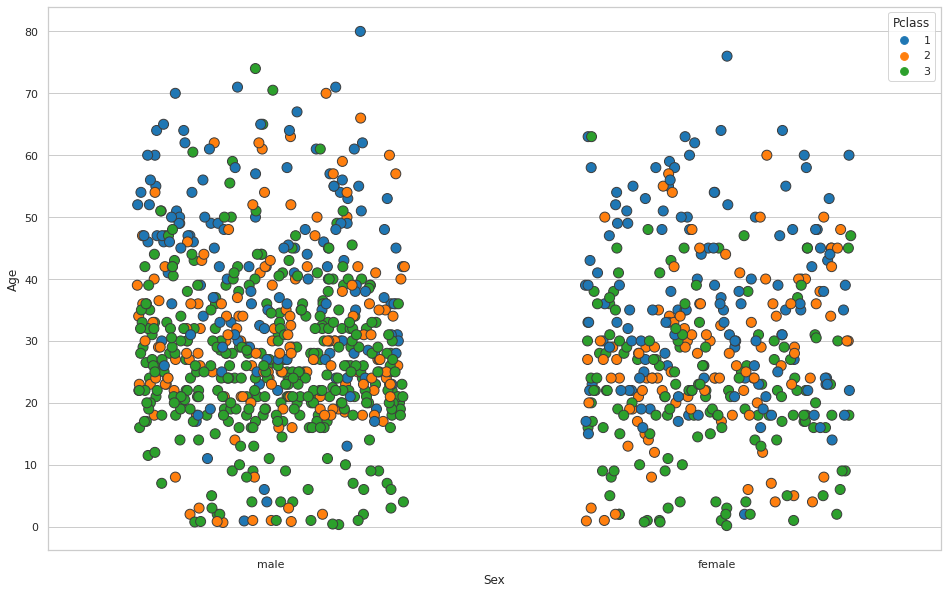

In [ ]:
plt.figure(figsize=(16,10))
sns.set_theme(style='whitegrid')
sns.stripplot(y=titanic.Age, x = titanic.Sex, hue = titanic.Pclass, palette='tab10',jitter=0.3, linewidth=1,size=10)

In [ ]:
titanic.Age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [ ]:
titanic.Age.value_counts()

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
20.50     1
22.50     1
66.00     1
11.50     1
0.67      1
Name: Age, Length: 98, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


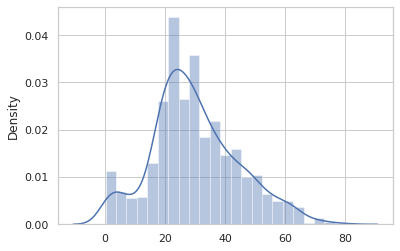

In [ ]:
sns.distplot(x = titanic.Age)

In [ ]:
titanic[titanic.Age < 1].groupby('Sex').mean()

,Pclass,Age,SibSp,Parch,Fare,Survived
Sex,,,,,,
female,2.750,0.6475,1.5,1.500,21.710400,1.0
male,2.375,0.6975,0.5,1.375,32.480213,1.0


In [ ]:
titanic[(titanic.Age < 18) & (titanic.Survived == 1)].groupby('Sex').mean()

,Pclass,Age,SibSp,Parch,Fare,Survived
Sex,,,,,,
female,2.315789,9.592105,0.736842,0.868421,33.172261,1.0
male,2.260870,5.072609,0.826087,1.304348,37.641304,1.0


In [ ]:
titanic.Age = titanic.Age.fillna(titanic.Age.median(),axis=0)

In [ ]:
titanic.Age.describe()

count    1309.000000
mean       29.503186
std        12.905241
min         0.170000
25%        22.000000
50%        28.000000
75%        35.000000
max        80.000000
Name: Age, dtype: float64

In [ ]:
titanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,NaN
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,NaN
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,NaN
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,NaN
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,NaN


In [ ]:
age_bins = pd.cut(titanic.Age, bins=4, include_lowest=True, ordered=True, retbins=True)[0]

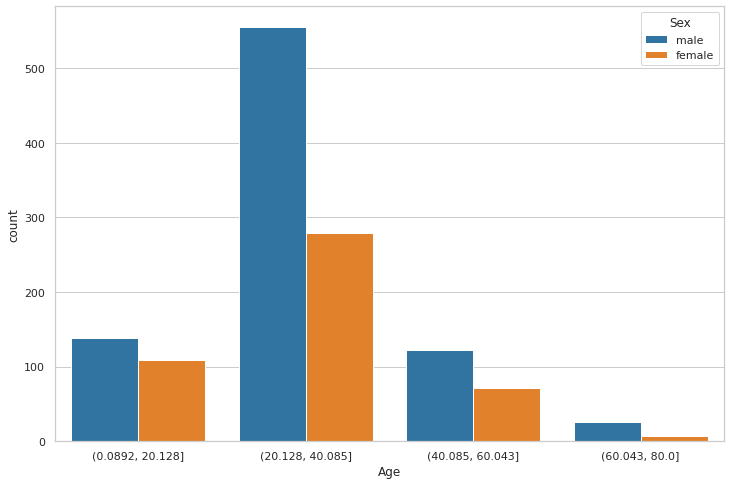

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x = age_bins, hue=titanic.Sex, palette='tab10')

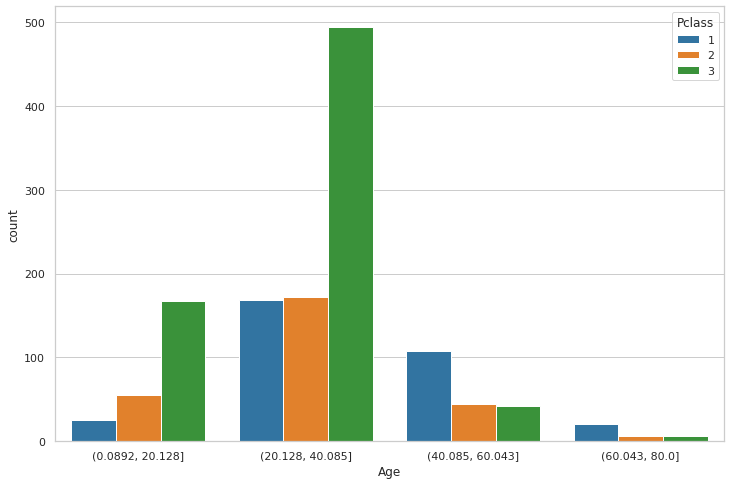

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x = age_bins, hue=titanic.Pclass, palette='tab10')

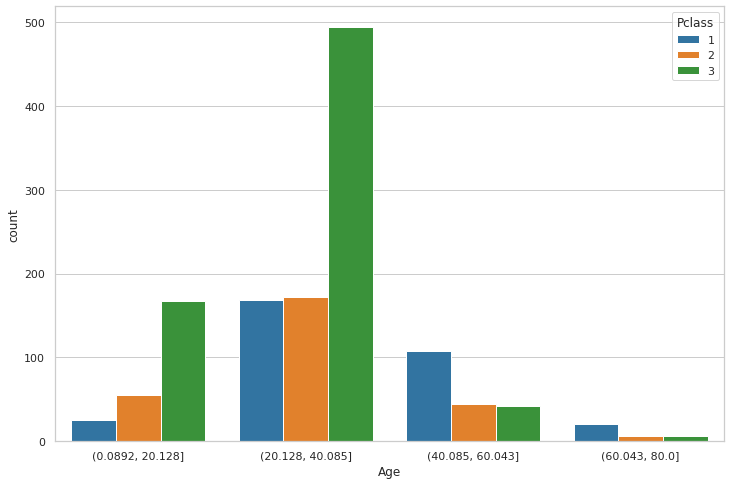

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x = age_bins, hue=titanic.Pclass, palette='tab10')

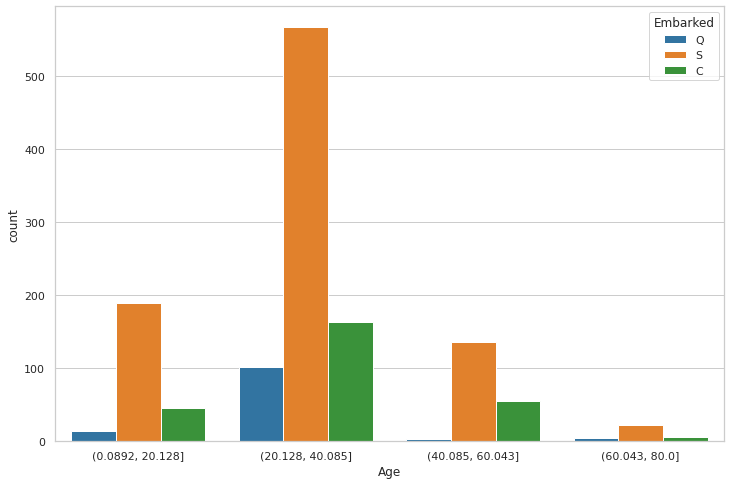

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x = age_bins, hue=titanic.Embarked, palette='tab10')

In [ ]:
titanic.SibSp.describe()

count    1309.000000
mean        0.498854
std         1.041658
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         8.000000
Name: SibSp, dtype: float64

In [ ]:
titanic.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [ ]:
titanic.groupby('SibSp').mean()

,Pclass,Age,Parch,Fare,Survived
SibSp,,,,,
0,2.351291,30.246251,0.181818,25.785406,0.345395
1,2.034483,30.684201,0.717868,48.711300,0.535885
2,2.333333,24.202381,0.571429,48.940576,0.464286
3,2.550000,18.650000,1.250000,71.332090,0.250000
4,3.000000,8.772727,1.545455,30.594318,0.166667
5,3.000000,10.166667,2.000000,46.900000,0.000000
8,3.000000,26.500000,2.000000,69.550000,0.000000


In [ ]:
titanic.loc[titanic.SibSp == 8]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1080,3,"Sage, Miss. Ada",female,28.0,8,2,CA. 2343,69.55,NaN,S,NaN
1252,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S,NaN
160,3,"Sage, Master. Thomas Henry",male,28.0,8,2,CA. 2343,69.55,NaN,S,0.0
181,3,"Sage, Miss. Constance Gladys",female,28.0,8,2,CA. 2343,69.55,NaN,S,0.0
202,3,"Sage, Mr. Frederick",male,28.0,8,2,CA. 2343,69.55,NaN,S,0.0
325,3,"Sage, Mr. George John Jr",male,28.0,8,2,CA. 2343,69.55,NaN,S,0.0
793,3,"Sage, Miss. Stella Anna",female,28.0,8,2,CA. 2343,69.55,NaN,S,0.0
847,3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,CA. 2343,69.55,NaN,S,0.0
864,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,CA. 2343,69.55,NaN,S,0.0


In [ ]:
titanic.loc[titanic.SibSp == 5]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1032,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S,NaN
60,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S,0.0
72,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S,0.0
387,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S,0.0
481,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S,0.0
684,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S,0.0


In [ ]:
(titanic[((titanic.SibSp > 0) | (titanic.Parch >0)) & (titanic.Pclass == 3)].Survived.sum())/(titanic
                                    [((titanic.SibSp > 0) | (titanic.Parch >0)) & (titanic.Pclass == 3)].Survived.count())


0.2994011976047904

In [ ]:
(titanic[((titanic.SibSp > 0) | (titanic.Parch >0)) & (titanic.Pclass == 2)].Survived.sum())/(titanic
                                    [((titanic.SibSp > 0) | (titanic.Parch >0)) & (titanic.Pclass == 2)].Survived.count())


0.6375

In [ ]:
(titanic[((titanic.SibSp > 0) | (titanic.Parch >0)) & (titanic.Pclass == 1)].Survived.sum())/(titanic
                                    [((titanic.SibSp > 0) | (titanic.Parch >0)) & (titanic.Pclass == 1)].Survived.count())


0.7289719626168224

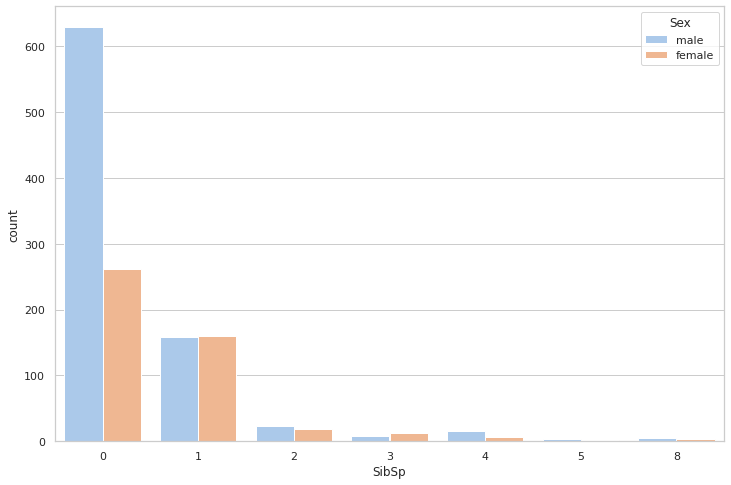

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x=titanic.SibSp, hue=titanic.Sex, palette='pastel')

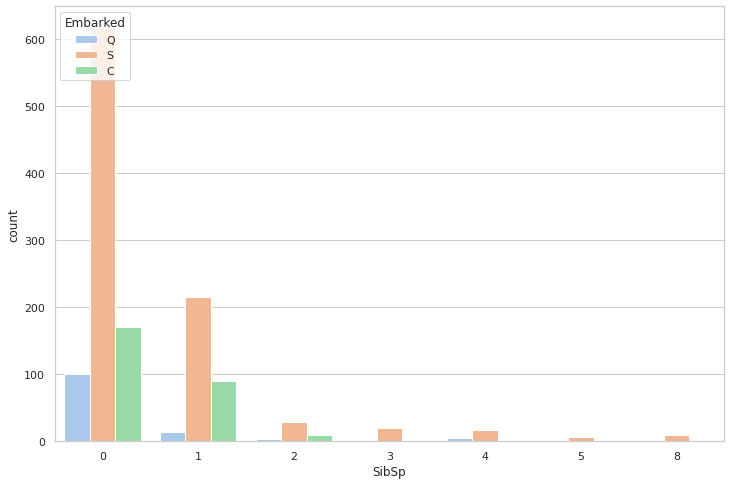

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x=titanic.SibSp, hue=titanic.Embarked, palette='pastel')

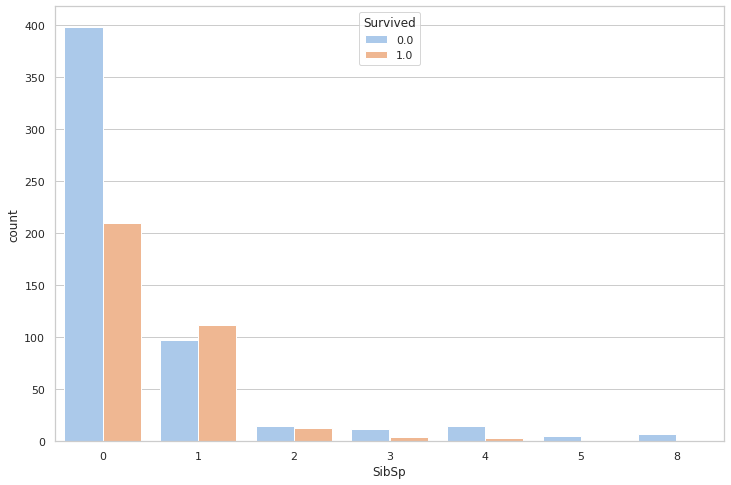

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(x=titanic.SibSp, hue=titanic.Survived, palette='pastel')

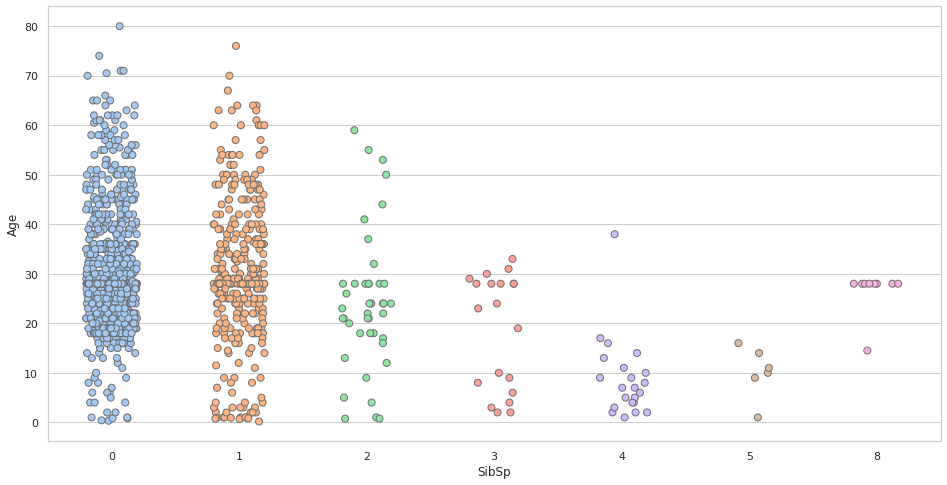

In [ ]:
plt.figure(figsize=(16,8))
sns.stripplot(x=titanic.SibSp, y = titanic.Age ,  palette='pastel', size = 7, linewidth=1,jitter=0.2)

In [ ]:
titanic.Parch.describe()

count    1309.000000
mean        0.385027
std         0.865560
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.000000
Name: Parch, dtype: float64

In [ ]:
titanic.Parch.value_counts()


0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [ ]:
titanic.loc[titanic.Parch == 6]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1031,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.9,NaN,S,NaN
679,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.9,NaN,S,0.0


In [ ]:
titanic.loc[titanic.Parch == 5]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1066,3,"Asplund, Mr. Carl Oscar Vilhelm Gustafsson",male,40.0,1,5,347077,31.3875,NaN,S,NaN
14,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S,0.0
26,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S,1.0
611,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S,0.0
639,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S,0.0
886,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,0.0


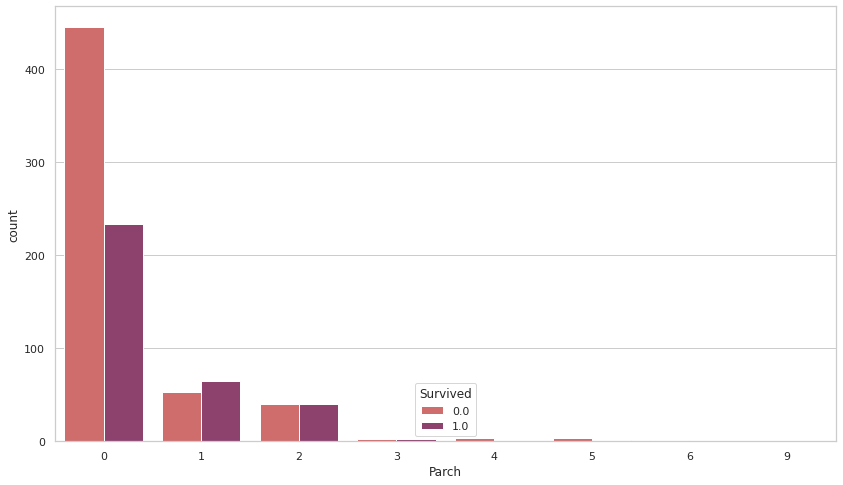

In [ ]:
plt.figure(figsize=(14,8))
sns.countplot(x=titanic.Parch, hue=titanic.Survived, palette='flare')

In [ ]:
titanic.Ticket

PassengerId
892        330911
893        363272
894        240276
895        315154
896       3101298
          ...    
887        211536
888        112053
889    W./C. 6607
890        111369
891        370376
Name: Ticket, Length: 1309, dtype: object

In [ ]:
titanic.Ticket.isnull().sum()

0

In [ ]:
titanic.Ticket.value_counts()[:20]

CA. 2343        11
CA 2144          8
1601             8
3101295          7
347082           7
PC 17608         7
347077           7
S.O.C. 14879     7
347088           6
113781           6
382652           6
19950            6
W./C. 6608       5
349909           5
220845           5
PC 17757         5
113503           5
16966            5
4133             5
113760           4
Name: Ticket, dtype: int64

In [ ]:
titanic.Ticket.value_counts()

CA. 2343     11
CA 2144       8
1601          8
3101295       7
347082        7
             ..
A/5 21172     1
8471          1
111427        1
347075        1
7598          1
Name: Ticket, Length: 929, dtype: int64

In [ ]:
titanic[titanic.Ticket == titanic.Ticket.value_counts().index[3]]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1259,3,"Riihivouri, Miss. Susanna Juhantytar Sanni""""",female,22.0,0,0,3101295,39.6875,NaN,S,NaN
51,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,NaN,S,0.0
165,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S,0.0
267,3,"Panula, Mr. Ernesti Arvid",male,16.0,4,1,3101295,39.6875,NaN,S,0.0
639,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",female,41.0,0,5,3101295,39.6875,NaN,S,0.0
687,3,"Panula, Mr. Jaako Arnold",male,14.0,4,1,3101295,39.6875,NaN,S,0.0
825,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S,0.0


In [ ]:
titanic.Fare.describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [ ]:
titanic.Fare.fillna(titanic.Fare.mean(),axis=0, inplace=True)

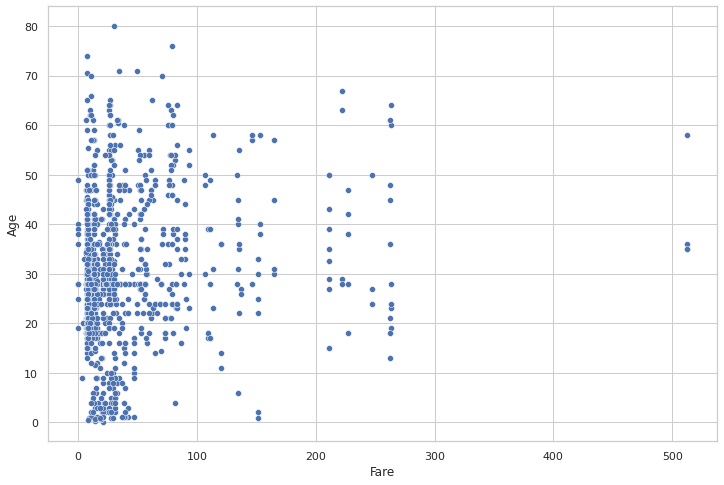

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=titanic.Fare, y = titanic.Age)

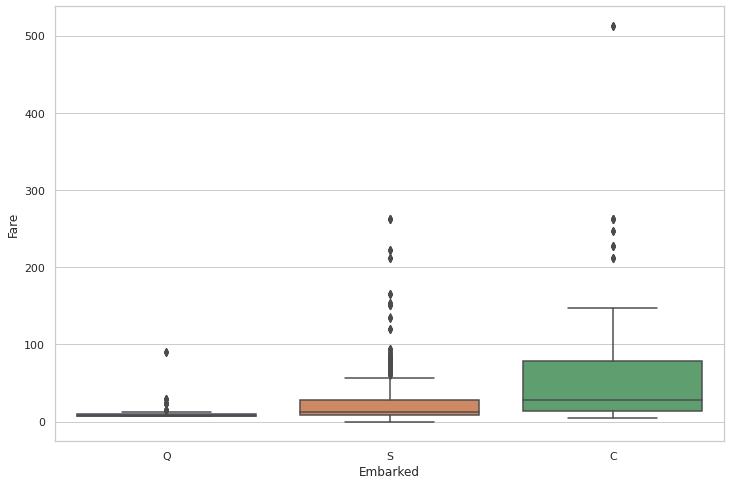

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x=titanic.Embarked, y = titanic.Fare)

In [ ]:
titanic.Cabin.isnull().sum()

1014

In [ ]:
titanic.Cabin.describe()

count             295
unique            186
top       C23 C25 C27
freq                6
Name: Cabin, dtype: object

In [ ]:
titanic.drop('Cabin', axis=1, inplace=True)

In [ ]:
titanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,NaN
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,NaN
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,NaN
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,NaN
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,NaN


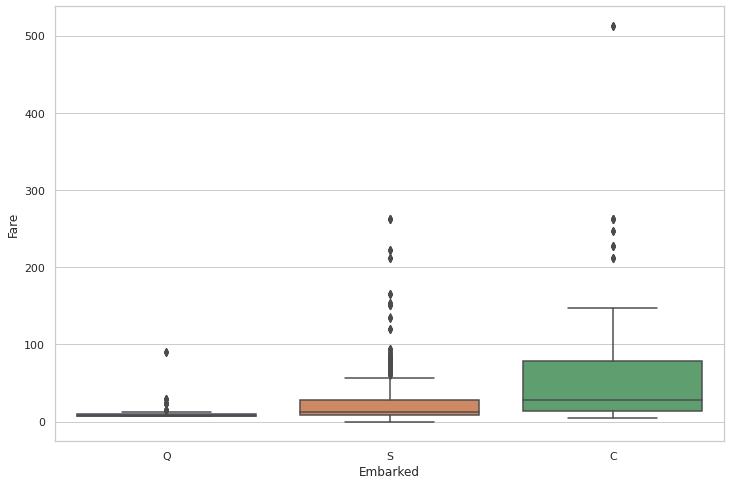

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x=titanic.Embarked, y = titanic.Fare)

In [ ]:
titanic.Embarked.describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [ ]:
titanic.Embarked.value_counts() 

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [ ]:
titanic.Embarked.isnull().sum()

2

In [ ]:
titanic.Embarked.fillna(value= titanic.Embarked.mode(),axis=0)

PassengerId
892    Q
893    S
894    Q
895    S
896    S
      ..
887    S
888    S
889    S
890    C
891    Q
Name: Embarked, Length: 1309, dtype: object

In [ ]:
titanic[titanic.Embarked.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
PassengerId,,,,,,,,,,
62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,1.0
830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,1.0


In [ ]:
type(titanic[titanic.Embarked.isnull()].Embarked.iloc[0]) 


float

In [ ]:
titanic.Embarked = titanic.Embarked.astype(str)


In [ ]:
titanic[titanic.Embarked.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
PassengerId,,,,,,,,,,


In [ ]:
titanic['Embarked'].replace('nan','S', inplace=True)

In [ ]:
titanic.iloc[829]

Pclass                    3
Name        Hart, Mr. Henry
Sex                    male
Age                      28
SibSp                     0
Parch                     0
Ticket               394140
Fare                 6.8583
Embarked                  Q
Survived                  0
Name: 412, dtype: object

In [ ]:
titanic[titanic.Embarked == 'nan']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
PassengerId,,,,,,,,,,


In [ ]:
titanic.Embarked.isnull().sum()

0

In [ ]:
titanic.groupby('Embarked').mean()

,Pclass,Age,SibSp,Parch,Fare,Survived
Embarked,,,,,,
C,1.851852,31.401556,0.400000,0.370370,62.336267,0.553571
Q,2.894309,28.256098,0.341463,0.113821,12.409012,0.389610
S,2.344978,29.111081,0.549127,0.425764,27.540046,0.339009


In [ ]:
titanic['Family_members'] = titanic['SibSp'] + titanic['Parch'] + 1

In [ ]:
titanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Family_members
PassengerId,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,NaN,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,NaN,2
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,NaN,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,NaN,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,NaN,3


In [ ]:
titanic['Title'] = titanic.Name.map(lambda x : (x.split(',')[1].split('.')[0].strip()))

In [ ]:
titanic.Title

PassengerId
892      Mr
893     Mrs
894      Mr
895      Mr
896     Mrs
       ... 
887     Rev
888    Miss
889    Miss
890      Mr
891      Mr
Name: Title, Length: 1309, dtype: object

In [ ]:
titanic.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Major             2
Mlle              2
Ms                2
Dona              1
Mme               1
Sir               1
Lady              1
Capt              1
Jonkheer          1
Don               1
the Countess      1
Name: Title, dtype: int64

In [ ]:
titanic.Title = titanic.Title.replace(['Sir','Capt','Don','Col','Jonkheer','Rev','Major'], 'Mr')

titanic.Title = titanic.Title.replace(['Dona','the Countess','Lady'], 'Mrs')

titanic.Title = titanic.Title.replace(['Ms','Mlle','Mme'], 'Miss')

titanic.Title.value_counts()

Mr        775
Miss      265
Mrs       200
Master     61
Dr          8
Name: Title, dtype: int64

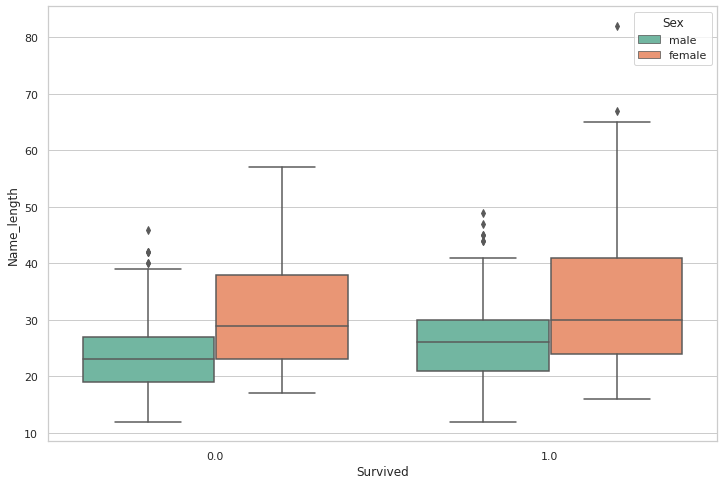

In [ ]:
titanic['Name_length'] = titanic.Name.map(lambda x : len(x)).values

plt.figure(figsize=(12,8))
sns.color_palette('Set2')
sns.boxplot(y= titanic.Name_length, x = titanic.Survived, hue = titanic.Sex, palette='Set2')

In [ ]:
titanic.Name_length.describe()

count    1309.000000
mean       27.130634
std         9.506503
min        12.000000
25%        20.000000
50%        25.000000
75%        30.000000
max        82.000000
Name: Name_length, dtype: float64

In [ ]:
def namelength_bins(x):
    int(x)
    if (x > 10) and (x<=20):
        return 0
    elif (x>20) and (x<=25):
        return 1
    elif (x>25) and (x<=30):
        return 2
    elif (x>30) and (x<=85):
        return 3
titanic.Name_length = titanic.Name_length.map(lambda x : namelength_bins(x))
titanic.Name_length.value_counts()

0    358
3    327
1    318
2    306
Name: Name_length, dtype: int64

In [ ]:
def age_bins(x):
    int(x)
    if (x>0) and (x<=20):
        return 0
    elif (x>20) and (x<=40):
        return 1
    elif (x>40) and (x<=60):
        return 2
    elif (x>60) and (x<=90):
        return 3
    
    
titanic.Age = titanic.Age.map(lambda x : age_bins(x))
titanic.Age.value_counts()

1    834
0    248
2    194
3     33
Name: Age, dtype: int64

In [ ]:
def title_bins(x):
    if x == 'Mr':
        return 0
    elif x == 'Mrs':
        return 1
    elif x == 'Miss':
        return 2
    elif x == 'Master':
        return 3
    else:
        return 4
    
    
titanic.Title = titanic.Title.map(lambda x : title_bins(x))
titanic.Title.value_counts()

0    775
2    265
1    200
3     61
4      8
Name: Title, dtype: int64

In [ ]:
def embarked_bins(x):
    
    if x == 'C':
        return 0
    elif x=='S':
        return 1
    else:
        return 2
    
    
titanic.Embarked = titanic.Embarked.map(lambda x : embarked_bins(x))
titanic.Embarked.value_counts()

1    916
0    270
2    123
Name: Embarked, dtype: int64

In [ ]:
titanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Family_members,Title,Name_length
PassengerId,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,1,0,0,330911,7.8292,2,NaN,1,0,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,2,1,0,363272,7.0000,1,NaN,2,1,3
894,2,"Myles, Mr. Thomas Francis",male,3,0,0,240276,9.6875,2,NaN,1,0,1
895,3,"Wirz, Mr. Albert",male,1,0,0,315154,8.6625,1,NaN,1,0,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,1,3101298,12.2875,1,NaN,3,1,3


In [ ]:
titanic.drop(columns=['Name','Ticket'],axis=1,inplace=True)

In [ ]:
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,Family_members,Title,Name_length
PassengerId,,,,,,,,,,,
892,3,male,1,0,0,7.8292,2,NaN,1,0,0
893,3,female,2,1,0,7.0000,1,NaN,2,1,3
894,2,male,3,0,0,9.6875,2,NaN,1,0,1
895,3,male,1,0,0,8.6625,1,NaN,1,0,0
896,3,female,1,1,1,12.2875,1,NaN,3,1,3


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          1309 non-null   int64  
 1   Sex             1309 non-null   object 
 2   Age             1309 non-null   int64  
 3   SibSp           1309 non-null   int64  
 4   Parch           1309 non-null   int64  
 5   Fare            1309 non-null   float64
 6   Embarked        1309 non-null   int64  
 7   Survived        891 non-null    float64
 8   Family_members  1309 non-null   int64  
 9   Title           1309 non-null   int64  
 10  Name_length     1309 non-null   int64  
dtypes: float64(2), int64(8), object(1)
memory usage: 162.7+ KB


In [ ]:
from sklearn.compose import make_column_selector as selector
column_selector = selector(dtype_include=object)
category = column_selector(titanic)
category

['Sex']

In [ ]:
categorical_data = titanic[category]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse=False)

In [ ]:
encoded_columns = encoder.fit_transform(categorical_data)

In [ ]:
encoded_columns

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [ ]:
feature_names = encoder.get_feature_names(input_features=categorical_data.columns)


In [ ]:
feature_names

array(['Sex_female', 'Sex_male'], dtype=object)

In [ ]:
features_list = []
for i in feature_names.tolist():
    features_list.append(i.split("_")[-1])

In [ ]:
features_list

['female', 'male']

In [ ]:
data_encoded = pd.DataFrame(columns=features_list, data = encoded_columns)

In [ ]:
data_encoded.set_index(titanic.index,inplace=True)

In [ ]:
new_titanic = pd.concat([titanic,data_encoded],axis=1)

In [ ]:
new_titanic.dtypes

Pclass              int64
Sex                object
Age                 int64
SibSp               int64
Parch               int64
Fare              float64
Embarked            int64
Survived          float64
Family_members      int64
Title               int64
Name_length         int64
female            float64
male              float64
dtype: object

In [ ]:
column_selector = selector(dtype_exclude= 'object')

In [ ]:
final_titanic = new_titanic[column_selector(new_titanic)]

In [ ]:
final_titanic

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived,Family_members,Title,Name_length,female,male
PassengerId,,,,,,,,,,,,
892,3,1,0,0,7.8292,2,NaN,1,0,0,0.0,1.0
893,3,2,1,0,7.0000,1,NaN,2,1,3,1.0,0.0
894,2,3,0,0,9.6875,2,NaN,1,0,1,0.0,1.0
895,3,1,0,0,8.6625,1,NaN,1,0,0,0.0,1.0
896,3,1,1,1,12.2875,1,NaN,3,1,3,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,1,0,0,13.0000,1,0.0,1,0,1,0.0,1.0
888,1,0,0,0,30.0000,1,1.0,1,2,2,1.0,0.0
889,3,1,1,2,23.4500,1,0.0,4,2,3,1.0,0.0


In [ ]:
final_titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 892 to 891
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          1309 non-null   int64  
 1   Age             1309 non-null   int64  
 2   SibSp           1309 non-null   int64  
 3   Parch           1309 non-null   int64  
 4   Fare            1309 non-null   float64
 5   Embarked        1309 non-null   int64  
 6   Survived        891 non-null    float64
 7   Family_members  1309 non-null   int64  
 8   Title           1309 non-null   int64  
 9   Name_length     1309 non-null   int64  
 10  female          1309 non-null   float64
 11  male            1309 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 172.9 KB


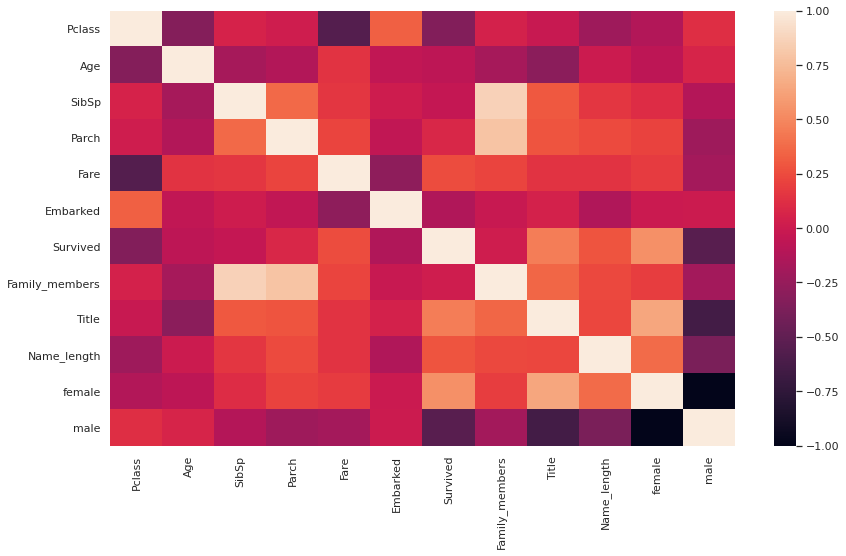

In [ ]:
plt.figure(figsize=(14,8))
torr = final_titanic.corr()
sns.heatmap(torr)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
final_titanic.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived,Family_members,Title,Name_length,female,male
PassengerId,,,,,,,,,,,,
892,3,1,0,0,7.8292,2,NaN,1,0,0,0.0,1.0
893,3,2,1,0,7.0000,1,NaN,2,1,3,1.0,0.0
894,2,3,0,0,9.6875,2,NaN,1,0,1,0.0,1.0
895,3,1,0,0,8.6625,1,NaN,1,0,0,0.0,1.0
896,3,1,1,1,12.2875,1,NaN,3,1,3,1.0,0.0


In [ ]:
test_data = final_titanic.iloc[891:]


In [ ]:
test_data.drop('Survived',axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
train_data = final_titanic.iloc[:891]

In [ ]:
train_data.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Survived,Family_members,Title,Name_length,female,male
PassengerId,,,,,,,,,,,,
892,3,1,0,0,7.8292,2,NaN,1,0,0,0.0,1.0
893,3,2,1,0,7.0000,1,NaN,2,1,3,1.0,0.0
894,2,3,0,0,9.6875,2,NaN,1,0,1,0.0,1.0
895,3,1,0,0,8.6625,1,NaN,1,0,0,0.0,1.0
896,3,1,1,1,12.2875,1,NaN,3,1,3,1.0,0.0


In [ ]:
target_class = 'Survived'
target = train_data.pop(target_class)

In [ ]:
train_data

,Pclass,Age,SibSp,Parch,Fare,Embarked,Family_members,Title,Name_length,female,male
PassengerId,,,,,,,,,,,
892,3,1,0,0,7.8292,2,1,0,0,0.0,1.0
893,3,2,1,0,7.0000,1,2,1,3,1.0,0.0
894,2,3,0,0,9.6875,2,1,0,1,0.0,1.0
895,3,1,0,0,8.6625,1,1,0,0,0.0,1.0
896,3,1,1,1,12.2875,1,3,1,3,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
469,3,1,0,0,7.7250,2,1,0,0,0.0,1.0
470,3,0,2,1,19.2583,0,4,2,2,1.0,0.0
471,3,1,0,0,7.2500,1,1,0,0,0.0,1.0


In [ ]:
train_data.drop(columns=['SibSp','Parch','female'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
titanic['Age'].mean()

1.0091673032849504

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


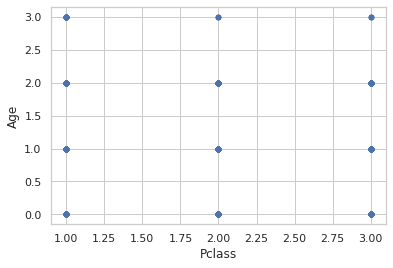

In [ ]:
titanic.plot.scatter(x="Pclass", y="Age")

In [ ]:
y =titanic['Survived']

In [ ]:
X=titanic['Sex']

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

#initialize label endoce as first step.
le = LabelEncoder()

titanic['Sex'] = le.fit_transform(titanic['Sex'].values)

In [ ]:
X=titanic.iloc[:,:4].values
y=titanic.iloc[:, 1].values
print(X)
print(y)

[[3 1 1 0]
 [3 0 2 1]
 [2 1 3 0]
 ...
 [3 0 1 1]
 [1 1 1 0]
 [3 1 1 0]]
[1 0 1 ... 0 1 1]


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(solver='liblinear',random_state=3)
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)

print('Accuracy_score:',accuracy_score(y_test,y_test_pred))

Accuracy_score: 1.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size =0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred= regressor.predict(X_test)
print(y_pred)

[ 1.00000000e+00  1.00000000e+00  1.06682523e-15  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.25505758e-15
  1.51091444e-15  6.56548274e-16  8.78592879e-16  1.00000000e+00
  8.44780625e-16  1.25505758e-15  1.00000000e+00  2.12459064e-16
  1.10063748e-15  1.00000000e+00  1.28886983e-15  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.03301298e-15  1.00000000e+00
  1.00000000e+00  1.00000000e+00  6.56548274e-16  1.03301298e-15
  1.00000000e+00  1.00000000e+00  1.03301298e-15  1.32268209e-15
  1.28886983e-15  1.47710219e-15  1.00000000e+00  8.44780625e-16
  1.10063748e-15  6.22736020e-16  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.25505758e-15  1.00000000e+00  1.00000000e+00
  1.00000000e+00  1.00000000e+00  2.12459064e-16  1.25505758e-15
  1.00000000e+00  1.00000000e+00  1.10063748e-15  1.00000000e+00
  1.00000000e+00  1.00000000e+00  1.00000000e+00  1.00000000e+00
  1.00000000e+00  8.78592879e-16  8.10968371e-16  1.00000000e+00
  1.00000000e+00  1.00000

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

1.0

In [ ]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,y_train)

pred_y = model1.predict(X_test)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(y_test,pred_y))

Acc= 1.0


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, y_train))
print("accuracy score", acc_random_forest)

accuracy score 1
